# Veusti75 - Twitter interactions

In [111]:
import sys
!{sys.executable} -m pip install pandas matplotlib plotly kaleido nltk sklearn seaborn


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 4.1 MB/s 


In [112]:
import pandas as pd

## Let's Specify the PATH for dataset:

In [113]:
data1_dir = "./HOPR Twitter activities/tweet_activity_metrics_hoprnet_20201201_20210101_en.csv"
data2_dir = "./HOPR Twitter activities/tweet_activity_metrics_hoprnet_20210101_20210201_en.csv"
data3_dir = "./HOPR Twitter activities/tweet_activity_metrics_hoprnet_20210201_20210301_en.csv"
data4_dir = "./HOPR Twitter activities/tweet_activity_metrics_hoprnet_20210301_20210401_en.csv"
data5_dir = "./HOPR Twitter activities/tweet_activity_metrics_hoprnet_20210401_20210414_en.csv"


## Reading the data

In [114]:
#READ FUNCTION
def data_read(path):
    data = pd.read_csv(path)
    return data

#Lets call the function and create the dataframes
data1 = data_read(data1_dir)
data2 = data_read(data2_dir)
data3 = data_read(data3_dir)
data4 = data_read(data4_dir)
data5 = data_read(data5_dir)

Let's concatenate all the data in a single one

In [115]:
df = pd.concat([data1,data2,data3,data4,data5], ignore_index=True)

In [116]:
df

,Tweet id,Tweet permalink,Tweet text,time,impressions,engagements,engagement rate,retweets,replies,likes,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1342192808854224897,https://twitter.com/hoprnet/status/13421928088...,https://t.co/Zd1ddxYIZe https://t.co/F6iebN71lv,2020-12-24 19:37 +0000,8994.0,192.0,0.021348,9.0,2.0,27.0,...,-,-,-,-,-,-,-,-,-,-
1,1337433178450108416,https://twitter.com/hoprnet/status/13374331784...,"Looking great, @Stakely_io team! Our Ambassado...",2020-12-11 16:24 +0000,9453.0,122.0,0.012906,5.0,1.0,18.0,...,-,-,-,-,-,-,-,-,-,-
2,1333827182112759808,https://twitter.com/hoprnet/status/13338271821...,🇨🇭 Basòdino v2 Testnet Results are Here! 🎉\n\n...,2020-12-01 17:35 +0000,12068.0,217.0,0.017981,5.0,0.0,22.0,...,-,-,-,-,-,-,-,-,-,-
3,1354911468202897414,https://twitter.com/hoprnet/status/13549114682...,Happy #DataPrivacyDay!\n\nHOPR is committed to...,2021-01-28 21:57 +0000,10936.0,220.0,0.020117,11.0,1.0,37.0,...,-,-,-,-,-,-,-,-,-,-
4,1354459400602312709,https://twitter.com/hoprnet/status/13544594006...,🇨🇭🏔 We're so proud of our community running t...,2021-01-27 16:01 +0000,96735.0,3263.0,0.033731,50.0,25.0,173.0,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1378255955364769793,https://twitter.com/hoprnet/status/13782559553...,❗️We've added another bounty to @gitcoin \n\nI...,2021-04-03 08:00 +0000,12403.0,557.0,0.044908,20.0,4.0,78.0,...,-,-,-,-,-,-,-,-,-,-
170,1377969062064451588,https://twitter.com/hoprnet/status/13779690620...,Dear Community... what shall we call you?\n\nH...,2021-04-02 13:00 +0000,13469.0,830.0,0.061623,22.0,24.0,89.0,...,-,-,-,-,-,-,-,-,-,-
171,1377893564563226624,https://twitter.com/hoprnet/status/13778935645...,❓ Is Data Analysis your skillset?\n\nWe've set...,2021-04-02 08:00 +0000,11837.0,671.0,0.056687,20.0,1.0,77.0,...,-,-,-,-,-,-,-,-,-,-
172,1377614226055815171,https://twitter.com/hoprnet/status/13776142260...,🐣 Spring is here! 🐥\n\nWe’re celebrating the s...,2021-04-01 13:30 +0000,12836.0,796.0,0.062013,16.0,4.0,82.0,...,-,-,-,-,-,-,-,-,-,-


Now we need to dissect the "time" column

In [117]:
new_column = df["time"]

In [118]:
new_column

0      2020-12-24 19:37 +0000
1      2020-12-11 16:24 +0000
2      2020-12-01 17:35 +0000
3      2021-01-28 21:57 +0000
4      2021-01-27 16:01 +0000
                ...          
169    2021-04-03 08:00 +0000
170    2021-04-02 13:00 +0000
171    2021-04-02 08:00 +0000
172    2021-04-01 13:30 +0000
173    2021-04-01 08:00 +0000
Name: time, Length: 174, dtype: object

We see pandas admits there is only one column. Let's seperate them

In [119]:
seperate_info = new_column.str.split(' ', expand=True)


In [120]:
seperate_info

,0,1,2
0,2020-12-24,19:37,+0000
1,2020-12-11,16:24,+0000
2,2020-12-01,17:35,+0000
3,2021-01-28,21:57,+0000
4,2021-01-27,16:01,+0000
...,...,...,...
169,2021-04-03,08:00,+0000
170,2021-04-02,13:00,+0000
171,2021-04-02,08:00,+0000
172,2021-04-01,13:30,+0000


In [121]:
only_date = seperate_info[0]
only_time = seperate_info[1]

In [122]:
only_date, only_time

(0      2020-12-24
 1      2020-12-11
 2      2020-12-01
 3      2021-01-28
 4      2021-01-27
           ...    
 169    2021-04-03
 170    2021-04-02
 171    2021-04-02
 172    2021-04-01
 173    2021-04-01
 Name: 0, Length: 174, dtype: object,
 0      19:37
 1      16:24
 2      17:35
 3      21:57
 4      16:01
        ...  
 169    08:00
 170    13:00
 171    08:00
 172    13:30
 173    08:00
 Name: 1, Length: 174, dtype: object)

Now we need to determine which weekday corresponday to each date

In [123]:
import datetime 
from datetime import date
import calendar
  
def findDay(date):
    year, month, day = (int(i) for i in date.split('-'))    
    born = datetime.date(year, month, day)
    return born.strftime("%A")

In [124]:
weekdays_list = []
for i in only_date:
    date = i
    weekdays = findDay(date)
    weekdays_list.append(weekdays)
    #print(weekdays)

In [125]:
type(weekdays_list)

list

We manipulate pandas series. Here we have a list. So let's convert it back to pandas series

In [126]:
weekdays = pd.Series(weekdays_list)

The weekdays column is ready, so let's insert it in our dataframe

In [127]:
df["time"]=weekdays

In [128]:
#Let's rename the column
df.rename(columns={'time': 'day'}, inplace=True)

Let's insert the time column as well

In [129]:
df.insert(4, "time", only_time, allow_duplicates=False)
df.insert(3, "date", only_date, allow_duplicates=False)

In [130]:
df

,Tweet id,Tweet permalink,Tweet text,date,day,time,impressions,engagements,engagement rate,retweets,...,promoted hashtag clicks,promoted detail expands,promoted permalink clicks,promoted app opens,promoted app installs,promoted follows,promoted email tweet,promoted dial phone,promoted media views,promoted media engagements
0,1342192808854224897,https://twitter.com/hoprnet/status/13421928088...,https://t.co/Zd1ddxYIZe https://t.co/F6iebN71lv,2020-12-24,Thursday,19:37,8994.0,192.0,0.021348,9.0,...,-,-,-,-,-,-,-,-,-,-
1,1337433178450108416,https://twitter.com/hoprnet/status/13374331784...,"Looking great, @Stakely_io team! Our Ambassado...",2020-12-11,Friday,16:24,9453.0,122.0,0.012906,5.0,...,-,-,-,-,-,-,-,-,-,-
2,1333827182112759808,https://twitter.com/hoprnet/status/13338271821...,🇨🇭 Basòdino v2 Testnet Results are Here! 🎉\n\n...,2020-12-01,Tuesday,17:35,12068.0,217.0,0.017981,5.0,...,-,-,-,-,-,-,-,-,-,-
3,1354911468202897414,https://twitter.com/hoprnet/status/13549114682...,Happy #DataPrivacyDay!\n\nHOPR is committed to...,2021-01-28,Thursday,21:57,10936.0,220.0,0.020117,11.0,...,-,-,-,-,-,-,-,-,-,-
4,1354459400602312709,https://twitter.com/hoprnet/status/13544594006...,🇨🇭🏔 We're so proud of our community running t...,2021-01-27,Wednesday,16:01,96735.0,3263.0,0.033731,50.0,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1378255955364769793,https://twitter.com/hoprnet/status/13782559553...,❗️We've added another bounty to @gitcoin \n\nI...,2021-04-03,Saturday,08:00,12403.0,557.0,0.044908,20.0,...,-,-,-,-,-,-,-,-,-,-
170,1377969062064451588,https://twitter.com/hoprnet/status/13779690620...,Dear Community... what shall we call you?\n\nH...,2021-04-02,Friday,13:00,13469.0,830.0,0.061623,22.0,...,-,-,-,-,-,-,-,-,-,-
171,1377893564563226624,https://twitter.com/hoprnet/status/13778935645...,❓ Is Data Analysis your skillset?\n\nWe've set...,2021-04-02,Friday,08:00,11837.0,671.0,0.056687,20.0,...,-,-,-,-,-,-,-,-,-,-
172,1377614226055815171,https://twitter.com/hoprnet/status/13776142260...,🐣 Spring is here! 🐥\n\nWe’re celebrating the s...,2021-04-01,Thursday,13:30,12836.0,796.0,0.062013,16.0,...,-,-,-,-,-,-,-,-,-,-


### A bar chart that plots engagement (inclu. but not exhaustive: replies, likes, retweets) per tweet

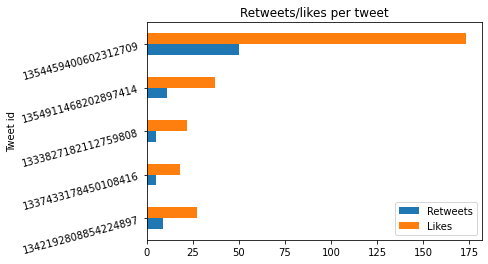

In [131]:
import matplotlib.pyplot as plot

#Python dictionary

RetweetsAndLikes  = {"Retweets": df["retweets"],

                       "Likes": df["likes"]};

index               = df["Tweet id"];

 

# Python dictionary into a pandas DataFrame

dataFrame       = pd.DataFrame(data = RetweetsAndLikes);

dataFrame.index = index;

 

dataFrame.head().plot.barh(rot=15, title="Retweets/likes per tweet"); #only display the first tweets

plot.show(block=True);


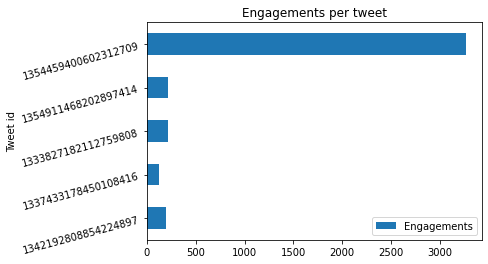

In [132]:
Engagements  = {"Engagements": df["engagements"]};

index               = df["Tweet id"];

 

# Python dictionary into a pandas DataFrame

dataFrame       = pd.DataFrame(data = Engagements);

dataFrame.index = index;

 

dataFrame.head().plot.barh(rot=15, title="Engagements per tweet");

plot.show(block=True);

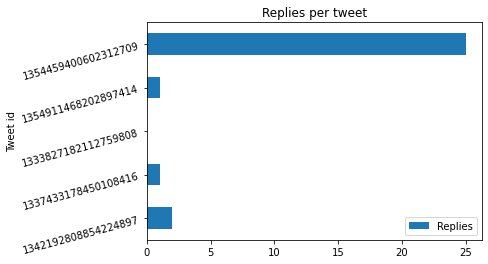

In [133]:
Replies  = {"Replies": df["replies"]};

index               = df["Tweet id"];

 

# Python dictionary into a pandas DataFrame

dataFrame       = pd.DataFrame(data = Replies);

dataFrame.index = index;

 

dataFrame.head().plot.barh(rot=15, title="Replies per tweet");

plot.show(block=True);

### A line chart that plots engagement (inclu. but not exhaustive: replies, likes, retweets) by day of the week


We need to group the data per weekday.

In [134]:
#data_per_day_of_week = df.loc[:, ['engagements','retweets','likes','replies', 'day'] ].groupby(['day']).sum()
data_per_day_of_week = df.loc[:, ['engagements','retweets','likes','replies', 'day'] ].groupby(['day']).mean().round()

In [135]:
data_per_day_of_week

,engagements,retweets,likes,replies
day,,,,
Friday,1353.0,43.0,190.0,19.0
Monday,1040.0,33.0,71.0,7.0
Saturday,1081.0,20.0,79.0,5.0
Sunday,1563.0,27.0,91.0,5.0
Thursday,745.0,17.0,60.0,3.0
Tuesday,801.0,22.0,67.0,6.0
Wednesday,1020.0,18.0,63.0,40.0


Let's reorder the weekdays

In [136]:
new_order_weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_per_day_of_week = data_per_day_of_week.reindex(index = new_order_weekdays)

In [137]:
data_per_day_of_week

,engagements,retweets,likes,replies
day,,,,
Monday,1040.0,33.0,71.0,7.0
Tuesday,801.0,22.0,67.0,6.0
Wednesday,1020.0,18.0,63.0,40.0
Thursday,745.0,17.0,60.0,3.0
Friday,1353.0,43.0,190.0,19.0
Saturday,1081.0,20.0,79.0,5.0
Sunday,1563.0,27.0,91.0,5.0


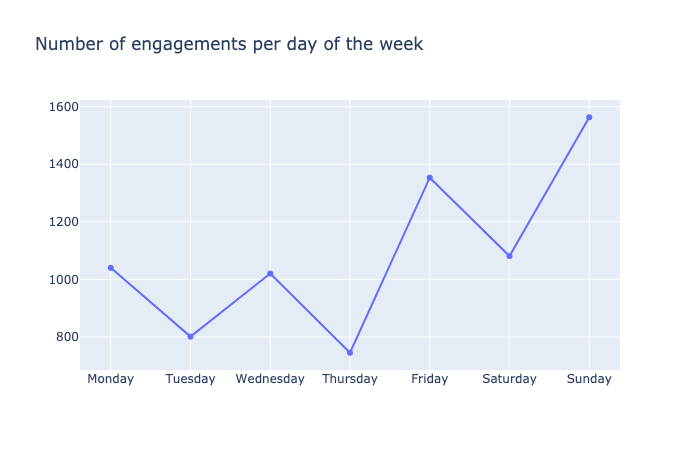

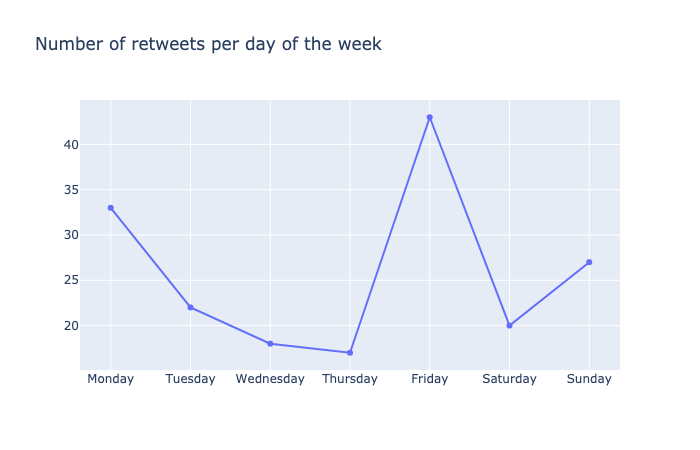

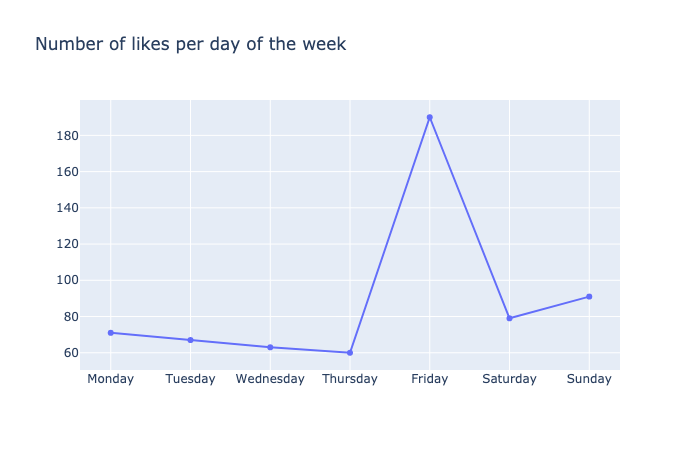

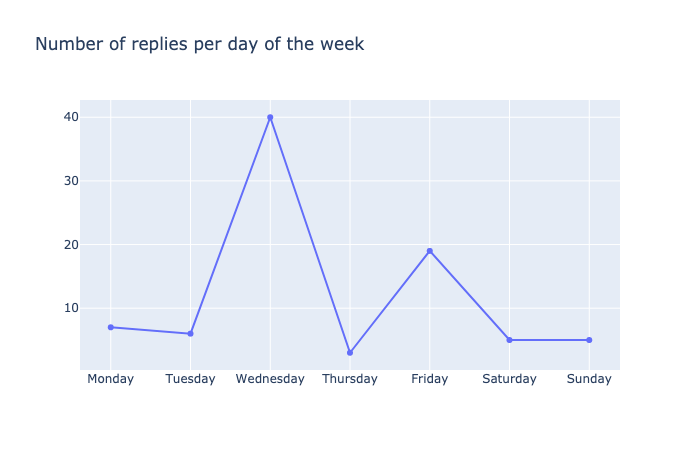

In [138]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

for x in data_per_day_of_week:
    fig = go.Figure([go.Scatter(x=new_order_weekdays, y=data_per_day_of_week[x])])
    fig.update_layout(title_text="Number of "'{}'" per day of the week".format(x))
    

    fig.show("png", engine="kaleido")

Line chart showing number of tweets per day

In [139]:
how_many_tweets_day = df.loc[:, ['date', 'day','Tweet id'] ].groupby(['day','date']).count()

In [140]:
how_many_tweets_day

Tweet id
day       date                
Friday    2020-12-11         1
          2021-01-15         1
          2021-02-05         1
          2021-02-12         1
          2021-02-19         5
...                        ...
Wednesday 2021-02-24        22
          2021-03-03         4
          2021-03-17         1
          2021-03-24         2
          2021-04-07         5

[66 rows x 1 columns]

In [141]:
how_many_tweets_day = how_many_tweets_day.rename(columns={"Tweet id": "Number_of_tweets"})
#how_many_tweets_day = how_many_tweets_day.reindex(index = new_order_weekdays)

In [142]:
how_many_tweets_day #verification

Number_of_tweets
day       date                        
Friday    2020-12-11                 1
          2021-01-15                 1
          2021-02-05                 1
          2021-02-12                 1
          2021-02-19                 5
...                                ...
Wednesday 2021-02-24                22
          2021-03-03                 4
          2021-03-17                 1
          2021-03-24                 2
          2021-04-07                 5

[66 rows x 1 columns]

In [143]:
how_many_tweets_day.reset_index(inplace=True)

In [144]:
how_many_tweets_day

,day,date,Number_of_tweets
0,Friday,2020-12-11,1
1,Friday,2021-01-15,1
2,Friday,2021-02-05,1
3,Friday,2021-02-12,1
4,Friday,2021-02-19,5
...,...,...,...
61,Wednesday,2021-02-24,22
62,Wednesday,2021-03-03,4
63,Wednesday,2021-03-17,1
64,Wednesday,2021-03-24,2


In [145]:
how_many_tweets_day = how_many_tweets_day.loc[:, ['date', 'day','Number_of_tweets'] ].groupby(['day']).mean()

In [146]:
how_many_tweets_day = how_many_tweets_day.reindex(index = new_order_weekdays)

In [147]:
how_many_tweets_day

,Number_of_tweets
day,
Monday,3.375000
Tuesday,2.300000
Wednesday,4.200000
Thursday,2.000000
Friday,2.181818
Saturday,2.142857
Sunday,2.333333


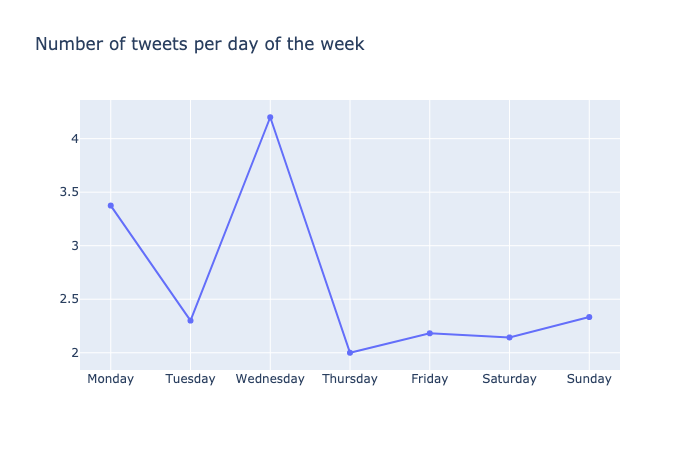

In [148]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

for x in how_many_tweets_day:

    fig = go.Figure([go.Scatter(x=new_order_weekdays, y=how_many_tweets_day[x])])
    fig.update_layout(title_text="Number of tweets per day of the week")
    
    fig.show("png", engine="kaleido")

### A line chart that plots engagement (inclu. but not exhaustive: replies, likes, retweets) by time (with a reasonable time interval) of the day


In [149]:
df["time"].max()

'23:30'

In [150]:
df["time"].min()

'05:59'

Let's create six hour intervals

In [151]:
first_sixth = df.loc[(df['time'] > "00:00") & (df['time'] <= "04:00") , ['engagements','retweets', 'likes','replies','time']]

second_sixth = df.loc[(df['time'] > "04:00") & (df['time'] <= "08:00") , ['engagements','retweets', 'likes','replies','time']]

third_sixth = df.loc[(df['time'] > "08:00") & (df['time'] <= "12:00") , ['engagements','retweets', 'likes','replies','time']]

fourth_sixth = df.loc[(df['time'] > "12:00") & (df['time'] <= "16:00") , ['engagements','retweets', 'likes','replies','time']]

fifth_sixth = df.loc[(df['time'] > "16:00") & (df['time'] <= "20:00") , ['engagements','retweets', 'likes','replies','time']]

sixth_sixth = df.loc[(df['time'] > "20:00") & (df['time'] <= "24:00") , ['engagements','retweets', 'likes','replies','time']]

In [152]:
fifth_sixth.head() #verification

,engagements,retweets,likes,replies,time
0,192.0,9.0,27.0,2.0,19:37
1,122.0,5.0,18.0,1.0,16:24
2,217.0,5.0,22.0,0.0,17:35
4,3263.0,50.0,173.0,25.0,16:01
6,1490.0,33.0,55.0,5.0,19:27


In [153]:
new_info_1 = []

for n in first_sixth.iloc[:,:-1]: #to pass the last column (time column)
    info_1 = first_sixth[n].mean()
    new_info_1.append(info_1)

In [154]:
new_info_2 = []

for n in second_sixth.iloc[:,:-1]: #to pass the last column (time column)
    info_2 = second_sixth[n].mean()
    new_info_2.append(info_2)

In [155]:
new_info_3 = []

for n in third_sixth.iloc[:,:-1]: #to pass the last column (time column)
    info_3 = third_sixth[n].mean()
    new_info_3.append(info_3)

In [156]:
new_info_4 = []

for n in fourth_sixth.iloc[:,:-1]: #to pass the last column (time column)
    info_4 = fourth_sixth[n].mean()
    new_info_4.append(info_4)

In [157]:
new_info_5 = []

for n in fifth_sixth.iloc[:,:-1]: #to pass the last column (time column)
    info_5=fifth_sixth[n].mean()
    new_info_5.append(info_5)

In [158]:
new_info_6 = []

for n in sixth_sixth.iloc[:,:-1]: #to pass the last column (time column)
    info_6=sixth_sixth[n].mean()
    new_info_6.append(info_6)

Let's convert back the data to Pandas series

In [159]:
def data_convert(x):
    liste = pd.Series(x)
    return liste

new_info_1 = data_convert(new_info_1)
new_info_2 = data_convert(new_info_2)
new_info_3 = data_convert(new_info_3)
new_info_4 = data_convert(new_info_4)
new_info_5 = data_convert(new_info_5)
new_info_6 = data_convert(new_info_6)



In [160]:
hour_range = ["0h-4h", "4h-8h", "8h-12h", "12h-16h", "16h-20h", "20h-0h"]


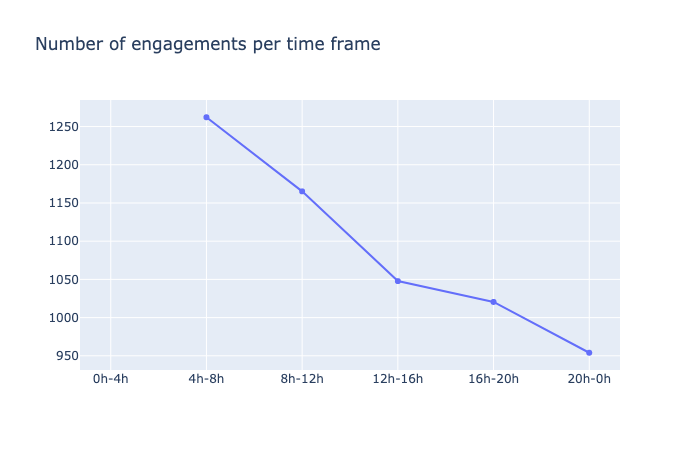

In [161]:
fig2 = go.Figure([go.Scatter(x=hour_range, y=[new_info_1[0], new_info_2[0], new_info_3[0], new_info_4[0], new_info_5[0], new_info_6[0]])])
    
fig2.update_layout(title_text="Number of engagements per time frame")
    

fig2.show("png")

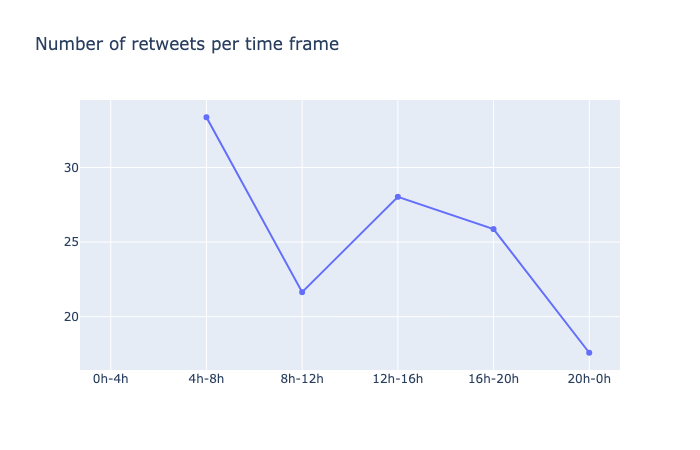

In [162]:
fig3 = go.Figure([go.Scatter(x=hour_range, y=[new_info_1[1], new_info_2[1], new_info_3[1], new_info_4[1], new_info_5[1], new_info_6[1]])])
    
fig3.update_layout(title_text="Number of retweets per time frame")
    

fig3.show("png")

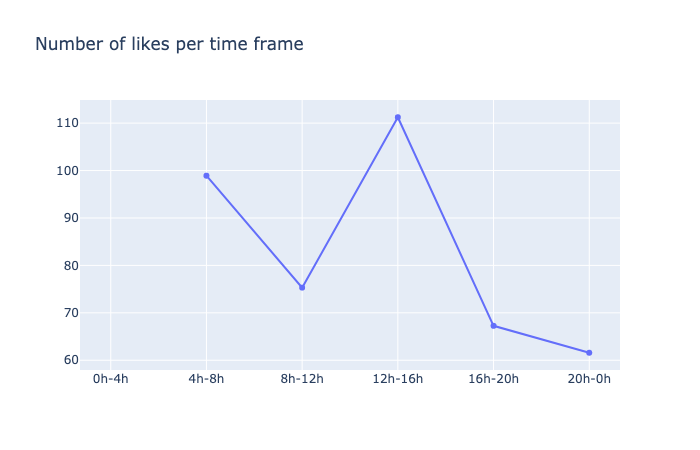

In [163]:
fig4 = go.Figure([go.Scatter(x=hour_range, y=[new_info_1[2], new_info_2[2], new_info_3[2], new_info_4[2], new_info_5[2], new_info_6[2]])])
    
fig4.update_layout(title_text="Number of likes per time frame")
    

fig4.show("png")

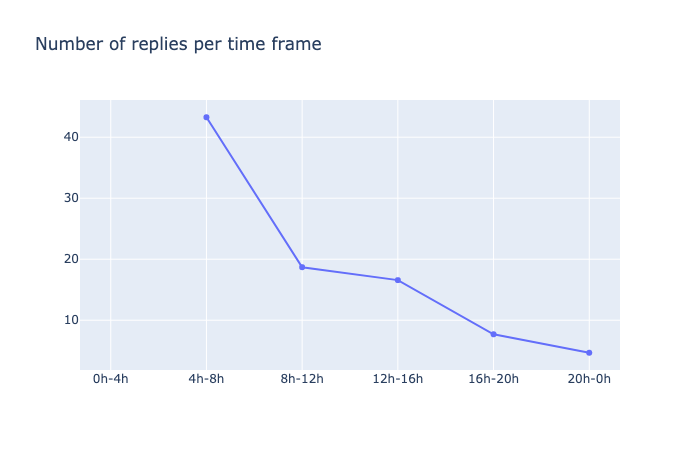

In [164]:
fig5 = go.Figure([go.Scatter(x=hour_range, y=[new_info_1[3], new_info_2[3], new_info_3[3], new_info_4[3], new_info_5[3], new_info_6[3]])])
    
fig5.update_layout(title_text="Number of replies per time frame")
    

fig5.show("png")

### Group tweets by topics and plots a bar chart that shows engagement (inclu. but not exhaustive: replies, likes, retweets) per topic


In [165]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

import re
import sklearn
import seaborn as sns

[nltk_data] Downloading package stopwords to /Users/qyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # # remove hashtags
    return tweet

In [167]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)

    tweet = emoji_pattern.sub(r'', tweet)
                               
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [168]:
#We need to rename the column Tweet text because there is a space
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


<ipython-input-168-d57927f01a4a>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [169]:
df["clean_tweet"] = df.tweet_text.apply(clean_tweet)

In [170]:
df

,tweet_id,tweet_permalink,tweet_text,date,day,time,impressions,engagements,engagement_rate,retweets,...,promoted_detail_expands,promoted_permalink_clicks,promoted_app_opens,promoted_app_installs,promoted_follows,promoted_email_tweet,promoted_dial_phone,promoted_media_views,promoted_media_engagements,clean_tweet
0,1342192808854224897,https://twitter.com/hoprnet/status/13421928088...,https://t.co/Zd1ddxYIZe https://t.co/F6iebN71lv,2020-12-24,Thursday,19:37,8994.0,192.0,0.021348,9.0,...,-,-,-,-,-,-,-,-,-,
1,1337433178450108416,https://twitter.com/hoprnet/status/13374331784...,"Looking great, @Stakely_io team! Our Ambassado...",2020-12-11,Friday,16:24,9453.0,122.0,0.012906,5.0,...,-,-,-,-,-,-,-,-,-,look great team ambassador await need setup as...
2,1333827182112759808,https://twitter.com/hoprnet/status/13338271821...,🇨🇭 Basòdino v2 Testnet Results are Here! 🎉\n\n...,2020-12-01,Tuesday,17:35,12068.0,217.0,0.017981,5.0,...,-,-,-,-,-,-,-,-,-,basòdino v testnet result curiou answer corr...
3,1354911468202897414,https://twitter.com/hoprnet/status/13549114682...,Happy #DataPrivacyDay!\n\nHOPR is committed to...,2021-01-28,Thursday,21:57,10936.0,220.0,0.020117,11.0,...,-,-,-,-,-,-,-,-,-,happi hopr commit privat web everyon hopr cont...
4,1354459400602312709,https://twitter.com/hoprnet/status/13544594006...,🇨🇭🏔 We're so proud of our community running t...,2021-01-27,Wednesday,16:01,96735.0,3263.0,0.033731,50.0,...,-,-,-,-,-,-,-,-,-,proud commun run hopr testnet h got node ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1378255955364769793,https://twitter.com/hoprnet/status/13782559553...,❗️We've added another bounty to @gitcoin \n\nI...,2021-04-03,Saturday,08:00,12403.0,557.0,0.044908,20.0,...,-,-,-,-,-,-,-,-,-,ad anoth bounti experi appreci attent hopr
170,1377969062064451588,https://twitter.com/hoprnet/status/13779690620...,Dear Community... what shall we call you?\n\nH...,2021-04-02,Friday,13:00,13469.0,830.0,0.061623,22.0,...,-,-,-,-,-,-,-,-,-,dear commun shall call decid possibl win hopr ...
171,1377893564563226624,https://twitter.com/hoprnet/status/13778935645...,❓ Is Data Analysis your skillset?\n\nWe've set...,2021-04-02,Friday,08:00,11837.0,671.0,0.056687,20.0,...,-,-,-,-,-,-,-,-,-,data analysi skillset set bounti relat elemen...
172,1377614226055815171,https://twitter.com/hoprnet/status/13776142260...,🐣 Spring is here! 🐥\n\nWe’re celebrating the s...,2021-04-01,Thursday,13:30,12836.0,796.0,0.062013,16.0,...,-,-,-,-,-,-,-,-,-,spring we’r celebr success launch hopr farm ...


We will filter the words max_df=0.9 means we discard any words that appear in >90% of tweets. In this dataset there won't be any words that are that common. We will also filter words using min_df=25, so words that appear in less than 25 tweets will be discarded

In [171]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=20, token_pattern='\w+|\$[\d\.]+|\S+') #changer les valeurs

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [172]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [173]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [174]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [175]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,commun,10.1,hopr,66.0,ama,13.3,us,20.9,hopr,40.2,hopr,0.1,join,13.7,hopr,0.1,token,8.8,commun,22.1
1,cet,6.9,cet,0.1,cet,9.8,join,9.5,token,29.4,us,0.1,hopr,11.1,us,0.1,cet,3.6,hopr,9.1
2,ama,6.8,commun,0.1,hopr,3.1,ama,6.3,commun,0.1,token,0.1,us,7.3,token,0.1,hopr,0.1,token,0.1
3,us,0.1,us,0.1,join,0.1,cet,0.1,ama,0.1,ama,0.1,cet,0.1,ama,0.1,commun,0.1,cet,0.1
4,join,0.1,ama,0.1,us,0.1,hopr,0.1,cet,0.1,commun,0.1,ama,0.1,commun,0.1,ama,0.1,join,0.1
5,token,0.1,token,0.1,token,0.1,commun,0.1,us,0.1,join,0.1,commun,0.1,join,0.1,us,0.1,us,0.1
6,hopr,0.1,join,0.1,commun,0.1,token,0.1,join,0.1,cet,0.1,token,0.1,cet,0.1,join,0.1,ama,0.1


In [176]:
variable = display_topics(model, tf_feature_names, no_top_words)

In [177]:
variable["Topic 0 words"]

0    commun
1       cet
2       ama
3        us
4      join
5     token
6      hopr
Name: Topic 0 words, dtype: object

In [178]:
keywords = variable["Topic 0 words"].tolist() #putting all the topics in a list

In [179]:
keywords

['commun', 'cet', 'ama', 'us', 'join', 'token', 'hopr']

In [180]:
empty = []
# iterating the columns
for col in df.columns:
    
    empty.append(col) #stock al column names in empty list

In [181]:
vide = pd.DataFrame(columns=empty) #convert to dataframe


In [182]:
vide

,tweet_id,tweet_permalink,tweet_text,date,day,time,impressions,engagements,engagement_rate,retweets,...,promoted_detail_expands,promoted_permalink_clicks,promoted_app_opens,promoted_app_installs,promoted_follows,promoted_email_tweet,promoted_dial_phone,promoted_media_views,promoted_media_engagements,clean_tweet


In [183]:
commun = vide
cet = vide
ama = vide
us = vide
join = vide
token = vide
hopr = vide

In [184]:
df['clean_tweet'].str.contains(keywords[0]) #commun

0      False
1      False
2      False
3      False
4       True
       ...  
169    False
170     True
171    False
172    False
173    False
Name: clean_tweet, Length: 174, dtype: bool

In [185]:
df2 = df
one = df['clean_tweet'].str.contains(keywords[0]) #commun
two = df['clean_tweet'].str.contains(keywords[1]) #cet
three = df['clean_tweet'].str.contains(keywords[2]) #ama
four = df['clean_tweet'].str.contains(keywords[3]) #us
five = df['clean_tweet'].str.contains(keywords[4]) #join
six = df['clean_tweet'].str.contains(keywords[5]) #token
seven = df['clean_tweet'].str.contains(keywords[6]) #hopr
commun = vide
cet = vide
ama = vide
us = vide
join = vide
token = vide
hopr = vide

for i in range(174):
    if one[i] == True:

        commun = commun.append(df2.loc[i], ignore_index=True)
    
    if two[i] == True:

        cet = cet.append(df2.loc[i], ignore_index=True)
        
    if three[i] == True:

        ama = ama.append(df2.loc[i], ignore_index=True)
        
    if four[i] == True:

        us = us.append(df2.loc[i], ignore_index=True)
        
    if five[i] == True:

        join = join.append(df2.loc[i], ignore_index=True)
        
    if six[i] == True:

        token = token.append(df2.loc[i], ignore_index=True)
        
    if seven[i] == True:

        hopr = hopr.append(df2.loc[i], ignore_index=True)
        

In [186]:
hopr

,tweet_id,tweet_permalink,tweet_text,date,day,time,impressions,engagements,engagement_rate,retweets,...,promoted_detail_expands,promoted_permalink_clicks,promoted_app_opens,promoted_app_installs,promoted_follows,promoted_email_tweet,promoted_dial_phone,promoted_media_views,promoted_media_engagements,clean_tweet
0,1333827182112759808,https://twitter.com/hoprnet/status/13338271821...,🇨🇭 Basòdino v2 Testnet Results are Here! 🎉\n\n...,2020-12-01,Tuesday,17:35,12068.0,217.0,0.017981,5.0,...,-,-,-,-,-,-,-,-,-,basòdino v testnet result curiou answer corr...
1,1354911468202897414,https://twitter.com/hoprnet/status/13549114682...,Happy #DataPrivacyDay!\n\nHOPR is committed to...,2021-01-28,Thursday,21:57,10936.0,220.0,0.020117,11.0,...,-,-,-,-,-,-,-,-,-,happi hopr commit privat web everyon hopr cont...
2,1354459400602312709,https://twitter.com/hoprnet/status/13544594006...,🇨🇭🏔 We're so proud of our community running t...,2021-01-27,Wednesday,16:01,96735.0,3263.0,0.033731,50.0,...,-,-,-,-,-,-,-,-,-,proud commun run hopr testnet h got node ...
3,1351223474564591617,https://twitter.com/hoprnet/status/13512234745...,🇨🇭🏔 The Guide to HOPR Titlis Testnet is now ...,2021-01-18,Monday,17:42,27380.0,729.0,0.026625,16.0,...,-,-,-,-,-,-,-,-,-,guid hopr titli testnet avail post get speed ...
4,1350174039684296705,https://twitter.com/hoprnet/status/13501740396...,"""... as we slowly turn it over to the communit...",2021-01-15,Friday,20:12,9373.0,217.0,0.023152,7.0,...,-,-,-,-,-,-,-,-,-,slowli turn commun book hopr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1378255955364769793,https://twitter.com/hoprnet/status/13782559553...,❗️We've added another bounty to @gitcoin \n\nI...,2021-04-03,Saturday,08:00,12403.0,557.0,0.044908,20.0,...,-,-,-,-,-,-,-,-,-,ad anoth bounti experi appreci attent hopr
91,1377969062064451588,https://twitter.com/hoprnet/status/13779690620...,Dear Community... what shall we call you?\n\nH...,2021-04-02,Friday,13:00,13469.0,830.0,0.061623,22.0,...,-,-,-,-,-,-,-,-,-,dear commun shall call decid possibl win hopr ...
92,1377893564563226624,https://twitter.com/hoprnet/status/13778935645...,❓ Is Data Analysis your skillset?\n\nWe've set...,2021-04-02,Friday,08:00,11837.0,671.0,0.056687,20.0,...,-,-,-,-,-,-,-,-,-,data analysi skillset set bounti relat elemen...
93,1377614226055815171,https://twitter.com/hoprnet/status/13776142260...,🐣 Spring is here! 🐥\n\nWe’re celebrating the s...,2021-04-01,Thursday,13:30,12836.0,796.0,0.062013,16.0,...,-,-,-,-,-,-,-,-,-,spring we’r celebr success launch hopr farm ...


In [187]:
hopr.loc[:, ['engagements','retweets','likes','replies'] ].sum()

engagements    122126.0
retweets         3239.0
likes           10686.0
replies          1094.0
dtype: float64

In [188]:
commun_stat = commun.loc[:, ['engagements','retweets','likes','replies'] ].sum()
cet_stat = cet.loc[:, ['engagements','retweets','likes','replies'] ].sum()
ama_stat = ama.loc[:, ['engagements','retweets','likes','replies'] ].sum()
us_stat = us.loc[:, ['engagements','retweets','likes','replies'] ].sum()
join_stat = join.loc[:, ['engagements','retweets','likes','replies'] ].sum()
token_stat = token.loc[:, ['engagements','retweets','likes','replies'] ].sum()
hopr_stat = hopr.loc[:, ['engagements','retweets','likes','replies'] ].sum()

In [189]:
empty2 = []
# iterating the columns
for col in df.columns:
    
    empty.append(col) #stock all column names in empty list

total = vide.append([commun_stat, cet_stat, ama_stat, us_stat, join_stat, token_stat, hopr_stat])

In [190]:
total = total.loc[:, ['engagements','retweets','likes','replies'] ]

In [191]:
total

,engagements,retweets,likes,replies
0,29637.0,571.0,2032.0,330.0
1,23252.0,786.0,1598.0,126.0
2,14863.0,281.0,1174.0,71.0
3,37089.0,760.0,2832.0,779.0
4,16571.0,316.0,1252.0,90.0
5,49453.0,1227.0,2811.0,244.0
6,122126.0,3239.0,10686.0,1094.0


In [192]:
keywords

['commun', 'cet', 'ama', 'us', 'join', 'token', 'hopr']

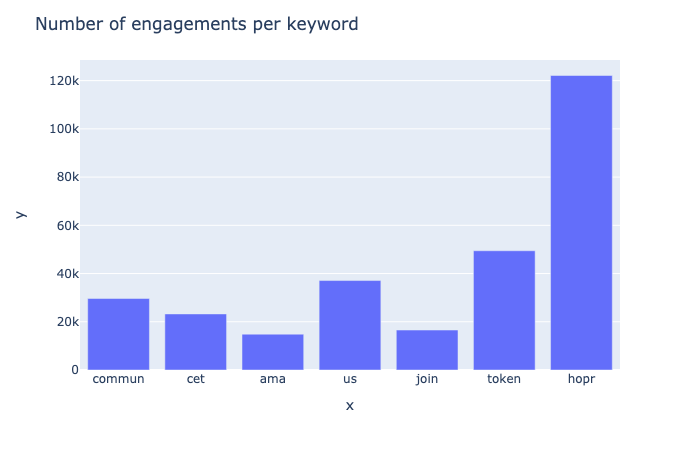

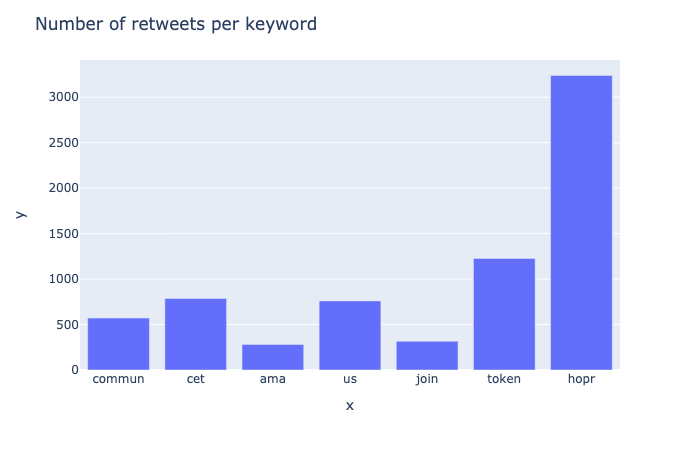

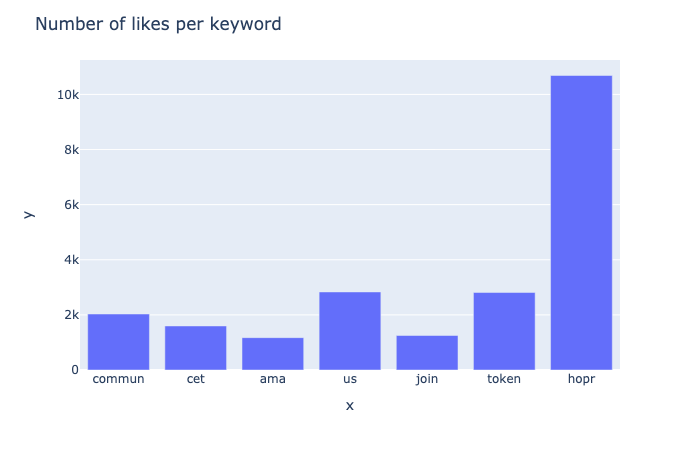

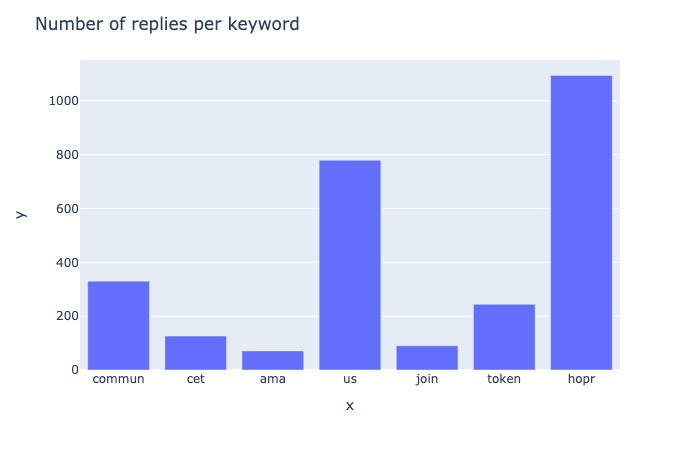

In [193]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

for x in total:
    fig = px.bar(x=keywords, y=total[x])
    fig.update_layout(title_text="Number of "'{}'" per keyword".format(x))
    

    fig.show("png", engine="kaleido")

1) Pattern of Twitter engagement: At which time of the week, a tweet has the most impression and the most retweets/replies.
    
    According to the graph, on Friday there are the most retweets and on Wednesday the most replies.
    

2) Which type of the content (key words/topic) receives the most engagement (e.g. impression, replies, likes, and retweets)

    According to the graph, tweets containing "token" have the most retweets (besides hopr) and on tweets containing "us" have the most replies (besides hopr).